In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
dfg = pd.read_csv("C:/Users/91970/OneDrive/Documents/gld_price_data.csv")

In [6]:
dfg

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [7]:
dfg.isna().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

<AxesSubplot:xlabel='SLV'>

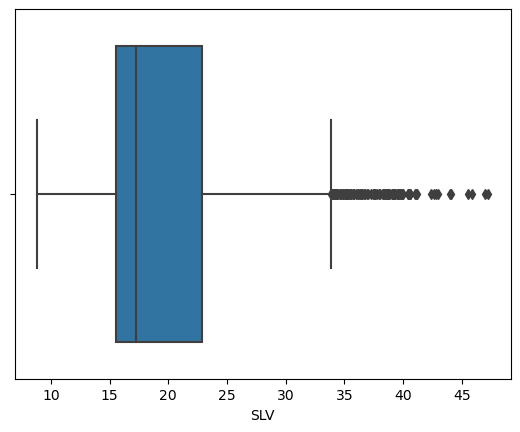

In [9]:
sns.boxplot(dfg["SLV"])

C:\Users\91970\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='USO'>

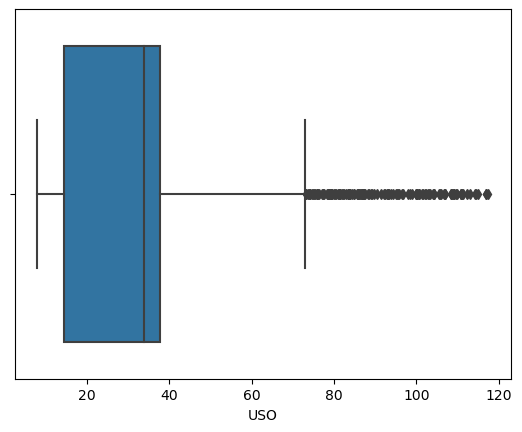

In [10]:
sns.boxplot(dfg["USO"])

In [11]:
q1=dfg["SLV"].quantile(0.25)

In [12]:
q1

15.57

In [13]:
q3=dfg["SLV"].quantile(0.75)

In [14]:
q3

22.8824995

In [15]:
iqr=q3-q1

In [16]:
iqr

7.312499500000001

In [17]:
lower=q1-(1.5*iqr)

In [18]:
lower

4.601250749999998

In [19]:
upper=q3+(1.5*iqr)

In [20]:
upper

33.85124875

In [21]:
dfg[dfg["SLV"]<lower]

,Date,SPX,GLD,USO,SLV,EUR/USD


In [22]:
dfg[dfg["SLV"]>upper]

,Date,SPX,GLD,USO,SLV,EUR/USD
694,3/1/2011,1306.329956,140.029999,40.480000,33.869999,1.382151
697,3/4/2011,1321.150024,139.350006,42.330002,34.689999,1.395888
698,3/7/2011,1310.130005,139.720001,42.369999,35.230000,1.399071
699,3/8/2011,1321.819946,139.360001,42.310001,35.180000,1.396394
700,3/9/2011,1320.020020,139.410004,42.049999,35.270000,1.389796
...,...,...,...,...,...,...
913,2/24/2012,1365.739990,172.229996,42.009998,34.369999,1.337363
914,2/27/2012,1367.589966,171.699997,41.180000,34.360001,1.346711
915,2/28/2012,1372.180054,173.490005,40.790001,35.830002,1.340662
917,3/1/2012,1374.089966,166.610001,41.750000,34.439999,1.332090


In [23]:
dfg["SLV"].map(lambda x :lower if x<lower else upper if x>upper else x)

0       15.1800
1       15.2850
2       15.1670
3       15.0530
4       15.5900
         ...   
2285    15.5100
2286    15.5300
2287    15.7400
2288    15.5600
2289    15.4542
Name: SLV, Length: 2290, dtype: float64

In [24]:
dfg["SLV"] = dfg["SLV"].map(lambda x :lower if x<lower else upper if x>upper else x)

In [25]:
dfg[dfg["SLV"]>upper]

,Date,SPX,GLD,USO,SLV,EUR/USD


In [26]:
qu1=dfg["USO"].quantile(0.25)

In [27]:
qu1

14.38

In [28]:
qu3=dfg["USO"].quantile(0.75)

In [29]:
qu3

37.8275015

In [30]:
iqr1=qu3-qu1

In [31]:
iqr1

23.447501499999994

In [32]:
lo=qu1-(1.5*iqr1)

In [33]:
lo

-20.791252249999992

In [34]:
up=qu3+(1.5*iqr)

In [35]:
up

48.79625075

In [36]:
dfg[dfg["USO"]<lo]

,Date,SPX,GLD,USO,SLV,EUR/USD


In [37]:
dfg[dfg["USO"]>up]

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099
...,...,...,...,...,...,...
170,11/5/2008,952.770020,72.800003,53.840000,10.210,1.291806
171,11/6/2008,904.880005,72.220001,50.150002,9.900,1.269503
172,11/7/2008,930.989990,72.500000,50.040001,9.940,1.271407
173,11/10/2008,919.210022,73.580002,51.230000,10.060,1.274795


In [38]:
dfg["USO"].map(lambda x :lo if x<lo else up if x>up else x)

0       48.796251
1       48.796251
2       48.796251
3       48.796251
4       48.796251
          ...    
2285    14.060000
2286    14.370000
2287    14.410000
2288    14.380000
2289    14.405800
Name: USO, Length: 2290, dtype: float64

In [39]:
dfg["USO"] = dfg["USO"].map(lambda x :lo if x<lo else up if x>up else x)

In [40]:
dfg[dfg["USO"]>up]

,Date,SPX,GLD,USO,SLV,EUR/USD


C:\Users\91970\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='EUR/USD'>

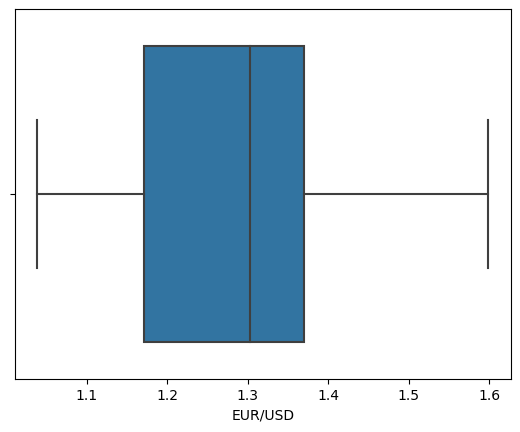

In [41]:
sns.boxplot(dfg["EUR/USD"])

C:\Users\91970\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SPX'>

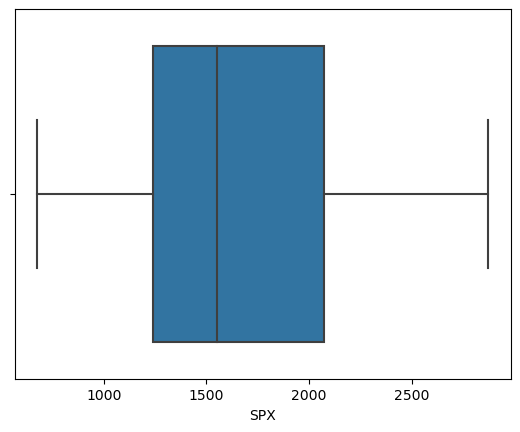

In [42]:
sns.boxplot(dfg["SPX"])

In [43]:
dfg.drop("Date",axis=1)

,SPX,GLD,USO,SLV,EUR/USD
0,1447.160034,84.860001,48.796251,15.1800,1.471692
1,1447.160034,85.570000,48.796251,15.2850,1.474491
2,1411.630005,85.129997,48.796251,15.1670,1.475492
3,1416.180054,84.769997,48.796251,15.0530,1.468299
4,1390.189941,86.779999,48.796251,15.5900,1.557099
...,...,...,...,...,...
2285,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,2730.129883,124.489998,14.380000,15.5600,1.193118


In [44]:
dfg.drop("Date",axis=1,inplace=True)

In [45]:
dfg

,SPX,GLD,USO,SLV,EUR/USD
0,1447.160034,84.860001,48.796251,15.1800,1.471692
1,1447.160034,85.570000,48.796251,15.2850,1.474491
2,1411.630005,85.129997,48.796251,15.1670,1.475492
3,1416.180054,84.769997,48.796251,15.0530,1.468299
4,1390.189941,86.779999,48.796251,15.5900,1.557099
...,...,...,...,...,...
2285,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,2730.129883,124.489998,14.380000,15.5600,1.193118


In [46]:
pd.get_dummies(dfg)

,SPX,GLD,USO,SLV,EUR/USD
0,1447.160034,84.860001,48.796251,15.1800,1.471692
1,1447.160034,85.570000,48.796251,15.2850,1.474491
2,1411.630005,85.129997,48.796251,15.1670,1.475492
3,1416.180054,84.769997,48.796251,15.0530,1.468299
4,1390.189941,86.779999,48.796251,15.5900,1.557099
...,...,...,...,...,...
2285,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,2730.129883,124.489998,14.380000,15.5600,1.193118


In [50]:
x=dfg.drop("GLD",axis=1)

In [51]:
x

,SPX,USO,SLV,EUR/USD
0,1447.160034,48.796251,15.1800,1.471692
1,1447.160034,48.796251,15.2850,1.474491
2,1411.630005,48.796251,15.1670,1.475492
3,1416.180054,48.796251,15.0530,1.468299
4,1390.189941,48.796251,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [52]:
y=dfg["GLD"]

In [53]:
y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=2)

In [56]:
x.shape,x_train.shape,x_test.shape

((2290, 4), (1832, 4), (458, 4))

In [57]:
y.shape,y_train.shape,y_test.shape

((2290,), (1832,), (458,))

In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
lreg=LinearRegression()

In [60]:
lreg.fit(x_train,y_train)

LinearRegression()

In [61]:
lreg.score(x_test,y_test)

0.9061018387136499

In [62]:
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor

In [63]:
from xgboost import XGBRFRegressor

In [64]:
from sklearn.linear_model import LinearRegression

In [65]:
from sklearn.svm import SVR

In [66]:
from sklearn.tree import DecisionTreeRegressor

In [67]:
rfr=RandomForestRegressor()

In [68]:
abr=AdaBoostRegressor()

In [69]:
gbr=GradientBoostingRegressor()

In [70]:
xgb=XGBRFRegressor()

In [71]:
lreg=LinearRegression()

In [72]:
svm=SVR()

In [73]:
dtr=DecisionTreeRegressor()

In [74]:
clist=[rfr,abr,gbr,xgb,lreg,svm,dtr]

In [75]:
clist

[RandomForestRegressor(),
 AdaBoostRegressor(),
 GradientBoostingRegressor(),
 XGBRFRegressor(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                n_estimators=100, n_jobs=None, num_parallel_tree=None,
                objective='reg:squarederror', predictor=None, random_state=None,
                reg_alpha=None, ...),
 LinearRegression(),
 SVR(),
 DecisionTreeRegressor()]

In [76]:
import time

In [77]:
for i in clist:
    print(i,end = "==")
    i.fit(x_train,y_train)
    m=i.score(x_test,y_test)
    print(m)
    time.sleep(0.6)

RandomForestRegressor()==0.9876316337428299
AdaBoostRegressor()==0.9376482386128101
GradientBoostingRegressor()==0.9750080425209368
XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               objective='reg:squarederror', predictor=None, random_state=None,
               reg_alpha=None, ...)==0.9784485510865367
LinearRegression()==0.9061018387136499
SVR()==0.11193203238001348
D

In [78]:
rlist=[]
for i in range(0,51):
    print("random_state=",i)
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    for m in clist:
        print(m,end = "==")
        m.fit(x_train,y_train)
        s=m.score(x_test,y_test)
        print(s)
        rlist.append(s)
        print("***************************************************************************************")
        print("Max = ",max(rlist))
        rlist.index(max(rlist))
        print("Max_index = ",rlist.index(max(rlist)))
        print("*******************************************************************************************")

random_state= 0
RandomForestRegressor()==0.9891451757552515
***************************************************************************************
Max =  0.9891451757552515
Max_index =  0
*******************************************************************************************
AdaBoostRegressor()==0.9391208741806538
***************************************************************************************
Max =  0.9891451757552515
Max_index =  0
*******************************************************************************************
GradientBoostingRegressor()==0.9811398252742027
***************************************************************************************
Max =  0.9891451757552515
Max_index =  0
*******************************************************************************************
XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None,
               early_stopping_rounds=None, enable_categorical=Fal